<div style="text-align: center;">
  <h1>Assignment 1</h1>
  Andy Kaarup Harboe - kqr508
</div>

## Opgave 1
Problemet som jeg vil forsøge at løse først, er at lave en regular expression, der er i stand til at matche danske CPR-numre at typen DDMMYYIIII og DDMMYY-IIII. Desuden skal min regular expression indeholde 4 grupper så det er muligt at sepere DD, MM, YY og IIII fra hinanden.

In [1]:
import re

data = '''
1903899821
010140-4001
3009586655
171001-8710
Random Text
'''

Jeg har defineret en ```data``` variabel som består af 2 CPR-numre af typen DDMMYYIIII, 2 CPR-numre af typen DDMMYY-IIII og en linje af noget tilfældigt tekst. Variablen vil jeg bruge til at vise at min regular expression, virker som den skal, altså matcher begge typer CPR-numre, ignorere teksten og opdeler hvert CPR-nummer i 4 grupper.

In [2]:
cpr_pattern = re.compile(r'([0-9]{2})([0-9]{2})([0-9]{2})[-]?([0-9]{4})') # raw string

for data_line in data.split('\n'):
    match = cpr_pattern.match(data_line)
    print(match.groups()) if match else None

('19', '03', '89', '9821')
('01', '01', '40', '4001')
('30', '09', '58', '6655')
('17', '10', '01', '8710')


Når jeg matcher min regular expression med hver linje i ```data```, lykkes den at matche med alle 4 CPR-numre og ignorere teksten. Desuden lykkes den at opdele begge typer CPR-numre i grupperne DD, MM, YY og IIII.

Det andet problem jeg vil løse, er at lave en funktion, der bruger systemet i tabellen nedenfor, til at bestemme hvilket århundrede som et bestemt CPR-nummer tilhøre.

<div align="center">

|   IIII      |  YY   | Born in century  |
|:-----------:|:-----:|:----------------:|
| 0001-3999   | 00-99 |      1900        |
| 4000-4999   | 00-36 |      2000        |
| 4000-4999   | 37-99 |      1900        |
| 5000-8999   | 00-57 |      2000        |
| 5000-8999   | 58-99 |      1800        |
| 9000-9999   | 00-36 |      2000        |
| 9000-9999   | 37-99 |      1900        |

</div>


In [3]:
from re import Match

def BornIn(cpr:Match[str]) -> int :
    """Returns the CPR-numbers corresponding century.
    
    Args:
        cpr (Match[str]) : Match object with groups DD, MM, YY and IIII.
    Returns:
        int : The century that the CPR-number is from."""
    
    YY = int(match.group(3))
    IIII = int(match.group(4))

    if IIII < 5000:
        if IIII < 4000:
            return 1900
        else:
            return 2000 if YY<37 else 1900
    else:
        if IIII < 9000:
            return 2000 if YY<58 else 1800
        else:
            return 2000 if YY<37 else 1900
        



Min funktion ```BornIn``` tager et match object magen til de som dem, som jeg fik i første del af opgaven. I min funktion tjekker jeg systematisk hvilket af intervallerne i tabellen, som først IIII tilhøre og derefter YY, hvorefter jeg ved ved hvilket århundrede som CPR-nummeret tilhøre, som jeg returnere. Desuden bruger jeg en form for hard coded binary search for at lave så tjeks som muligt.

For at teste min funktion, vil jeg lade den køre på match objekterne fra ```data``` variablen.

In [4]:
for data_line in data.split('\n'):
    match = cpr_pattern.match(data_line)
    print(BornIn(match)) if match else None

1900
1900
1800
2000


Det ser ud til at min funktion er i stand til korrekt at definere hvilket århundrede som de 4 CPR-numre tilhøre, på bagrund af stystemet fra tabellen.

## Opgave 2
I denne opgave vil jeg forsøge at cleane dataen i [```news_sample.csv```](https://raw.githubusercontent.com/several27/FakeNewsCorpus/master/news_sample.csv), så det er muligt at analysere på den. Da det i opgavebeskrivelsen ikke er blevet pointeret hvilke kolonner i csv filen, som skal cleanes, vil jeg kun cleane dataen i kolonnen ```content```, som er sprog data. Jeg nøjes med kun at behandle dette data, da det overordnede mål med dataen er at bruge det til at finde mønstre i fake news, som kan bruges til at bestemme hvorvidt noget ukendt er fake news eller ej.

Nedenfor bruger jeg ```pandas``` biblioteket til at indlæse ```news_sample.csv``` ind i en dataframe, for nemmere at kunne få et og overblik over filens indhold, samt for nemmere kunne behandle dataen.

In [5]:
import pandas as pd

csv_file = pd.read_csv('news_sample.csv').drop(columns=['Unnamed: 0'])
csv_file.head()

,id,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,keywords,meta_keywords,meta_description,tags,summary
0,141,awm.com,unreliable,http://awm.com/church-congregation-brings-gift...,Sometimes the power of Christmas will make you...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Church Congregation Brings Gift to Waitresses ...,Ruth Harris,NaN,[''],NaN,NaN,NaN
1,256,beforeitsnews.com,fake,http://beforeitsnews.com/awakening-start-here/...,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,Zurich Times,NaN,[''],NaN,NaN,NaN
2,700,cnnnext.com,unreliable,http://www.cnnnext.com/video/18526/never-hike-...,Never Hike Alone: A Friday the 13th Fan Film U...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Never Hike Alone - A Friday the 13th Fan Film ...,NaN,NaN,[''],Never Hike Alone: A Friday the 13th Fan Film ...,NaN,NaN
3,768,awm.com,unreliable,http://awm.com/elusive-alien-of-the-sea-caught...,"When a rare shark was caught, scientists were ...",2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Elusive ‘Alien Of The Sea ‘ Caught By Scientis...,Alexander Smith,NaN,[''],NaN,NaN,NaN
4,791,bipartisanreport.com,clickbait,http://bipartisanreport.com/2018/01/21/trumps-...,Donald Trump has the unnerving ability to abil...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Trump’s Genius Poll Is Complete & The Results ...,Gloria Christie,NaN,[''],NaN,NaN,NaN


Da jeg har valgt at det er kolonnen ```content``` som jeg vil arbejde med, initiere jeg først en ny dataframe, som til at indeholde den originale data, samt en kolonne for hvert step i data cleanings processen. Den første cleaning step, jeg foretager mig, er at gøre det hele til lowercase, da dette vil gøre det lettere at lave regular expressions til resten af cleaning processen. Herefter substiduere jeg først URL'er med ```<URL>```, emails med ```<EMAIL>```, da begge indeholder en blanding af bogstaver, tegn og tal, som vil være nemmere at matche inden tallene substidueres. Herefter takler jeg datoer der også indeholder tal, som jeg med fordel kan bruge til så vidt muligt kun at substiduere tal, der har noget med datoer at gøre, med ```<DATE>```. Min regular expression til datoer, forsøger så vidt muligt matche forkortelserne og det fulde navn på måneder og ugedage, dato og årstal, datoer skrevet som ordinaltal, og datoer skrevet som DD-MM-YYYY el. lign. Slutteligt substiduere jeg tal med ``<NUM>`` og fjerner alle white-spaces der kommer efter et andet white-space.

In [6]:
# Defining dataframe for data manipulation
csv_data = csv_file[['content']].rename(columns={'content': 'Original'})

# Converting to lowercase
def lowercase(text:str):
    return text.lower()

csv_data['Lowercase'] = csv_data['Original'].apply(lowercase)

# Replacing URLs
def sub_URL(text:str):
    regex = r'(?:http[s]?://)?(?:www\.)?[\w]+\.[a-z]{2,}[\w#-_]*'
    return re.sub(regex, ' <URL> ', text)

csv_data['<URL>'] = csv_data['Lowercase'].apply(sub_URL)

# Replacing Emails
def sub_EMAIL(text:str):
    regex = r'[\w._-]+@[\w._-]+\.[a-z]{2,}'
    return re.sub(regex, ' <EMAIL> ', text)

csv_data['<EMAIL>'] = csv_data['<URL>'].apply(sub_EMAIL)

# Replacing Dates
def sub_DATE(text:str):
    regex = r'(?:(?:(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|sep|dec|mon|tue|wed|thu|fri|sat|sun)[a-z]*\.?(?: \d{1,2},?)?)? (?:(?:20|19)[\d]{2}s?|(?:the )(?:[123]\d|\d)(?:st|nd|rd|th)))|(?:\b(?:\d{2}[-/]\d{2}[-/]\d{4}|\d{4}[-/]\d{2}[-/]\d{2})\b)'
    return re.sub(regex, ' <DATE> ', text)

csv_data['<DATE>'] = csv_data['<EMAIL>'].apply(sub_DATE)

# Replacing Numbers
def sub_NUM(text:str):
    regex = r'\d(?:\d|\.|\,)*'
    return re.sub(regex, ' <NUM> ', text)

csv_data['<NUM>'] = csv_data['<DATE>'].apply(sub_NUM)

# Deleting excessive white-spaces
def del_White_space(text:str):
    regex = r'(?<=\s)\s+'
    return re.sub(regex, '', text)

csv_data['White space'] = csv_data['<NUM>'].apply(del_White_space)

csv_data.head()

,Original,Lowercase,<URL>,<EMAIL>,<DATE>,<NUM>,White space
0,Sometimes the power of Christmas will make you...,sometimes the power of christmas will make you...,sometimes the power of christmas will make you...,sometimes the power of christmas will make you...,sometimes the power of christmas will make you...,sometimes the power of christmas will make you...,sometimes the power of christmas will make you...
1,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,awakening of 12 strands of dna – “reconnecting...,awakening of 12 strands of dna – “reconnecting...,awakening of 12 strands of dna – “reconnecting...,awakening of 12 strands of dna – “reconnecting...,awakening of <NUM> strands of dna – “reconne...,awakening of <NUM> strands of dna – “reconnect...
2,Never Hike Alone: A Friday the 13th Fan Film U...,never hike alone: a friday the 13th fan film u...,never hike alone: a friday the 13th fan film u...,never hike alone: a friday the 13th fan film u...,never hike alone: a <DATE> fan film usa | <D...,never hike alone: a <DATE> fan film usa | <D...,never hike alone: a <DATE> fan film usa | <DAT...
3,"When a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ..."
4,Donald Trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...


Da jeg for hvert cleaning step, har lavet en funktion, der tager en string og foretager det pågældende cleaning step, samler jeg nu dem alle i en ``clean_text`` funktion, til at udføre hele cleaning processen på én gang. Desuden påføre jeg cleaning funktionerne i samme rækkefølge, som ovenfor. Resultatet af ``clean_text`` funktionen kan sammenlignes med den originale tekst, i tabellen nedenfor.

In [7]:
def clean_text(data:str) -> str:
    """Returns a cleaned version of the text data.

    #### Manipulations:
    -   Lowercases all words.
    -   Deletes excessive white spaces (more than one).
    -   Replaces numbers whith ``<NUM>``.
    -   Replaces dates whith ``<DATE>``.
    -   Replaces emails whith ``<EMAIL>``.
    -   Replaces URLs whith ``<URL>``.
    
    Args:
        data (str) : A string of language data.
    
    Returns:
        str : A string of cleaned language data."""
    return del_White_space(sub_NUM(sub_DATE(sub_EMAIL(sub_URL(lowercase(data))))))

csv_data = csv_data[['Original']]
csv_data['Manually cleaned'] = csv_data['Original'].apply(clean_text)
csv_data.head()

,Original,Manually cleaned
0,Sometimes the power of Christmas will make you...,sometimes the power of christmas will make you...
1,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,awakening of <NUM> strands of dna – “reconnect...
2,Never Hike Alone: A Friday the 13th Fan Film U...,never hike alone: a <DATE> fan film usa | <DAT...
3,"When a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ..."
4,Donald Trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...


Da jeg nu har prøvet mig med at lave min egen funktion til tekst cleaning, vil jeg forsøge at bruge ``cleantext`` modulet til at fortage de samme cleaningsteps, som jeg gjorde i min ``clean_text`` funktion. Derfor laver jeg en ``clean_module`` funktion, som gør det samme som ``clean_text``, men så vidt muligt bruger modulet istedet. Fra ``cleantext`` modulet bruger jeg ``clean`` funktionen, som ligesom min ``clean_text`` funktion, har samlet alle tekst cleaning funktionaliteterne i én. Dog mangler ``cleantext`` modulet en måde at substiduere datoer på, så her bruger jeg istedet min ``sub_DATE`` funktion fra før. Da ``clean`` funktionen matcher hvert ciffer i et tal, istedet for hele tallet, som jeg ikke er glad for, har jeg også valgt at bruge min ``sub_NUM`` funktion fra før.

I ``clean_module`` funktionen foretager jeg dog nogle yderligere cleaning steps, som at fjerne telefon numre, fjerne valuta symboler, og fjerne tegnsætning, da dette vil gøre mit arbejde i Opgave 3, med data analyse, lidt nemmere. I tabellen nedenfor er det muligt sammenligne den originale tekst, med den manuelt cleanede tekst og den modul cleanede tekst.

In [8]:
import cleantext as clean

def clean_module(data:str) -> str:
    data = data.lower()
    data = sub_DATE(data)
    data = clean.clean(data, lower=0, no_urls=1, no_emails=1, no_phone_numbers=1, no_digits=0, no_punct=1, no_currency_symbols=1, replace_with_punct=' ')
    return sub_NUM(data)

csv_data['Cleantext module'] = csv_data['Original'].apply(clean_module)
csv_data.head()



Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


,Original,Manually cleaned,Cleantext module
0,Sometimes the power of Christmas will make you...,sometimes the power of christmas will make you...,sometimes the power of christmas will make you...
1,AWAKENING OF 12 STRANDS of DNA – “Reconnecting...,awakening of <NUM> strands of dna – “reconnect...,awakening of <NUM> strands of dna reconnecti...
2,Never Hike Alone: A Friday the 13th Fan Film U...,never hike alone: a <DATE> fan film usa | <DAT...,never hike alone a <DATE> fan film usa | <DATE...
3,"When a rare shark was caught, scientists were ...","when a rare shark was caught, scientists were ...",when a rare shark was caught scientists were l...
4,Donald Trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...,donald trump has the unnerving ability to abil...


## Opgave 3
Da jeg nu har cleanet dataen, vil jeg se på hvilket effekt, som cleaning processen har haft på antallet af unikke ord, altså tegn sepereret af white-space, i den originale data, versus den cleanede data. Af den cleanede data, bruger jeg den som jeg har brugt ``cleantext`` modulet til at cleane.

Nedenfor definere jeg funktionen ``get_vocab_freq_RAW``, som tager en streng og laver en panda serie med alle de unikke ord og antal forekomster, hvorefter den tilføjer denne serie, til ``csv_vocab_freq_RAW``, som er en samlet serie med unikke ord og antal forekomster, fra hele det originale datasættet. Endeligt omdanner jeg serien til en dataframe og udregner frekvensen af hvert ord, som jeg tilføjer som en ny kolonne.

In [9]:
csv_vocab_freq_RAW = pd.Series().value_counts()

def get_vocab_freq_RAW(text:str):
    global csv_vocab_freq_RAW
    csv_vocab_freq_RAW = csv_vocab_freq_RAW.add(pd.Series(text.split()).value_counts(), fill_value=0)

csv_data['Original'].apply(get_vocab_freq_RAW)

csv_vocab_freq_RAW = csv_vocab_freq_RAW.to_frame().sort_values(ascending=False, by='count').astype(int)
csv_vocab_freq_RAW['frequency'] = csv_vocab_freq_RAW['count'].apply(lambda x: x/csv_vocab_freq_RAW.__len__())
csv_vocab_freq_RAW

,count,frequency
the,8244,0.274754
of,4826,0.160840
to,4722,0.157374
and,4414,0.147109
a,3141,0.104683
...,...,...
“true”,1,0.000033
“truthful,1,0.000033
“uncovering,1,0.000033
“unlawful,1,0.000033


Under tabellen over de unikke ord i det originale data og antal forekomster og frekvens, ovenfor, ses det at den består af 30.005 rækker, og da hver række repræsentere et ord, betyder det at der i den originale data fremkommer 30.005 unikke ord (tegn sepereret af white-space).

Nedenfor har jeg udført samme procedure for den cleanede data, som for den originale data. De unikke ord, antal forekomster og frekvensen, ses i tabellen nedenfor.

In [10]:
csv_vocab_freq = pd.Series().value_counts()

def get_vocab_freq(text:str):
    global csv_vocab_freq
    csv_vocab_freq = csv_vocab_freq.add(pd.Series(text.split()).value_counts(), fill_value=0)

csv_data['Cleantext module'].apply(get_vocab_freq)

csv_vocab_freq = csv_vocab_freq.to_frame().sort_values(ascending=False, by='count').astype(int)
csv_vocab_freq['frequency'] = csv_vocab_freq['count'].apply(lambda x: x/csv_vocab_freq.__len__())
csv_vocab_freq

,count,frequency
the,9504,0.614589
of,4980,0.322038
to,4909,0.317447
and,4723,0.305419
a,3421,0.221223
...,...,...
abstruse,1,0.000065
absurd,1,0.000065
abundant,1,0.000065
yeoman,1,0.000065


Her ses det at tabellen over det cleanede data kun er 15.464 rækker lang, hvilket betyder at der i den cleanede data, forekommer 15.464 unikke ord.

Dette betyder at cleaning processen har gjort at der forekommer 14.541 færre unikke ord i datasættet, som svare til en reduktion på -48,46%. Denne reduktion i antallet af unikke ord, medfølger så også at forekomsterne af de unikke ord, er højere i det cleanede data, versus det originale, som eks. kan ses idet at der er 1.260 flere forekomster af orden 'the' i det cleanede data. Tilsammen har disse ting til følge af frekvensen af alle ord i det cleanede data er højere, da antal unikke ord er lavere, og antal forekomster af hvert ord er højere, som eks. kan ses idet at frekvensen af 'the' i det originale data er 27,48%, mens i det cleanede data er frekvensen 61,46%.

Da jeg allerede har beregnet frekvensen af hvert ord og sorteret dem derefter, vil jeg nu bruge ``matplotlib`` modulet til at plotte de 50 mest hyppigst forekommende ord og deres tilhørende frekvens.

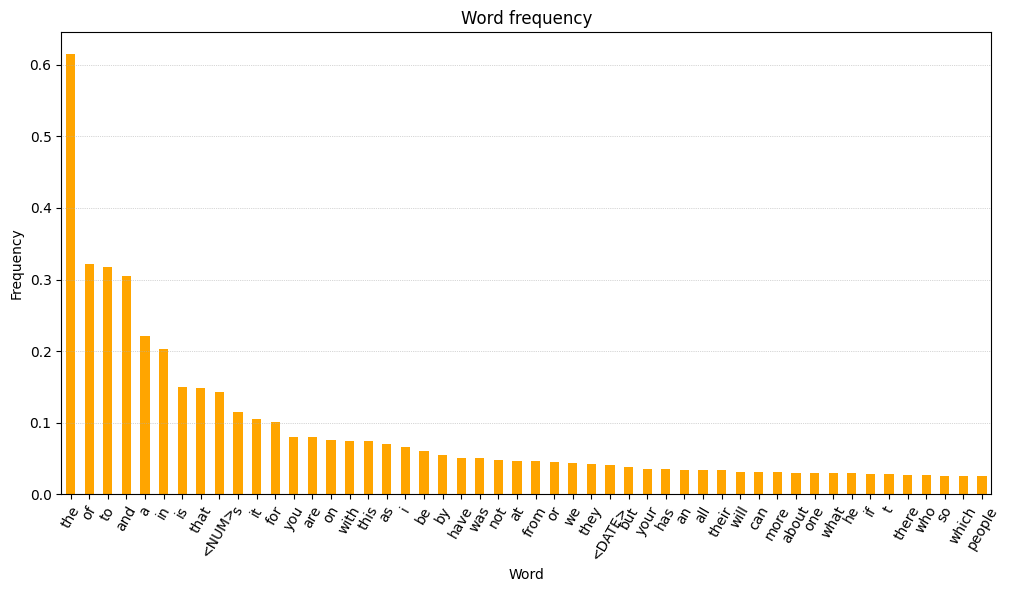

In [ ]:
import matplotlib.pyplot as plot

plot.figure(figsize=(12, 6))  
csv_vocab_freq['frequency'][:50].plot(kind='bar', color='orange')
plot.title('Word frequency')
plot.xlabel('Word')
plot.ylabel('Frequency')
plot.xticks(rotation=60)
plot.grid(True, axis='y', linestyle=':', linewidth=0.5)
plot.show()

I grafen ovenfor ser det ud til at frekvensen af ordende på fin vis følger Zip's lov.